<a href="https://colab.research.google.com/github/Codetemped/project_mern_memories/blob/PART_1_and_2/bcanc_detection_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Hello World")

Hello World


In [4]:
from google.colab import files
uploaded=files.upload()

for f in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes '.format(
      name=f,length=len(uploaded[f])
  ))

Saving data.csv to data (1).csv
user uploaded file "data (1).csv" with length 125204 bytes 


In [11]:
uploaded
import pandas as pd
import io
data=pd.read_csv('data.csv')
print(data.head())
print('----------------------------------------------------')
print(len(data))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
del data['Unnamed: 32']

In [22]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

#incoding categorical data

from sklearn.preprocessing import LabelEncoder
labelEncoder_x_1=LabelEncoder()
y=labelEncoder_x_1.fit_transform(y)

#splitting the dataset into Training asd test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)


#feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [23]:
print(x_train)
print(y_train)


[[-0.52787029  2.49821982 -0.59939466 ... -1.74713139 -0.79044533
  -0.91054389]
 [-0.55333608  0.29431013 -0.60759343 ... -0.62275667 -0.33646358
  -0.83551633]
 [ 2.15452653  0.40392257  2.26525805 ...  1.03846122 -0.11504791
   0.26488788]
 ...
 [-1.3297598  -0.21876938 -1.32088704 ... -0.98271999 -0.718764
  -0.13637062]
 [-1.24940108 -0.24209117 -1.2835826  ... -1.74713139 -1.58690456
  -1.01280367]
 [-0.74291476  1.08958336 -0.71827692 ... -0.2865488  -1.26354211
   0.19486216]]
[0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0

In [24]:
!pip install keras

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [31]:
#adding the input and first hiden layers

classifier=Sequential()
classifier.add(Dense(16,activation='relu',input_dim=30))
#adding second hidden layer
classifier.add(Dense(16,activation='relu'))
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [32]:
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [33]:
classifier.fit(x_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
6/6 [==============================] - 2s 5ms/step - loss: 0.6468 - accuracy: 0.7129
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.8066
Epoch 3/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.8574
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.8828
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.8926
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.9062
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.9180
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9199
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.9219
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.9238
Epoch 11/150
6/6 [===========

In [34]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

2/2 [==============================] - 0s 6ms/step


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

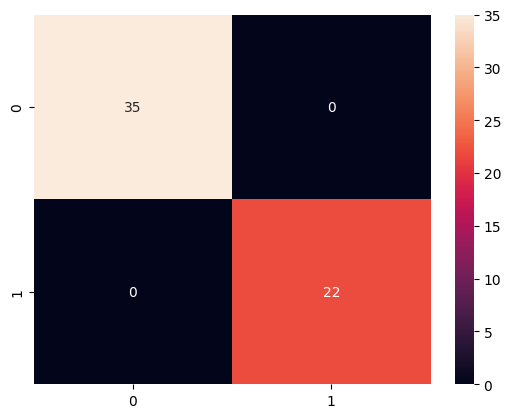

In [41]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')